In [1]:
# Install essential libraries (if not pre-installed)
!pip install pandas numpy matplotlib seaborn plotly --quiet


In [2]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization and random seed
sns.set(style="whitegrid")
np.random.seed(42)


In [4]:
# ---- 1. Projects Dataset ----
projects = pd.DataFrame({
    'Project_ID': np.arange(1001, 1016),
    'Client_Name': ['Acme Corp', 'Zenith Inc', 'Nova LLC', 'Acme Corp', 'Orion Ltd',
                    'SkyNet', 'Nova LLC', np.nan, 'Zenith Inc', 'Acme Corp',
                    'Orion Ltd', 'SkyNet', 'Zenith Inc', 'Nova LLC', 'Acme Corp'],
    'Module': ['CRM', 'HRM', 'Inventory', 'Finance', 'CRM',
               'Manufacturing', 'Sales', 'Finance', 'HRM', np.nan,
               'CRM', 'Finance', 'CRM', 'Inventory', 'Finance'],
    'Est_Duration_days': [60, 75, 90, 120, 45, 60, np.nan, 80, 100, 90, 75, 60, 85, 100, 110],
    'Actual_Duration_days': [70, np.nan, 95, 150, 40, 65, 100, 95, 110, 92, np.nan, 55, 95, 120, 100],
    'Start_Date': pd.date_range("2024-01-01", periods=15, freq="30D"),
})

# Introduce duplicates
projects = pd.concat([projects, projects.iloc[[2]]], ignore_index=True)
projects.head()
# ---- 2. Support Tickets Dataset ----
support = pd.DataFrame({
    'Ticket_ID': np.arange(5001, 5011),
    'Client_Name': ['Acme Corp', 'Zenith Inc', 'Nova LLC', 'Orion Ltd', 'SkyNet',
                    'Acme Corp', 'Nova LLC', 'Zenith Inc', 'SkyNet', np.nan],
    'Severity': [1, 2, np.nan, 3, 1, 2, 1, np.nan, 2, 3],
    'Resolution_Hours': [5, 10, 15, np.nan, 6, 7, 8, 12, 9, 20],
    'Ticket_Date': pd.date_range("2024-02-01", periods=10, freq="15D")
})
support.head()
# ---- 3. Financial Dataset ----
financials = pd.DataFrame({
    'Project_ID': np.random.choice(np.arange(1001, 1016), 12),
    'Cost_USD': [20000, np.nan, 50000, 70000, '80,000', '75000 USD', 65000, np.nan, 90000, 45000, '60000', '70,000'],
    'Invoiced_USD': [25000, 40000, 52000, '75,000', 85000, '80,000 USD', 70000, 95000, 90000, np.nan, 60000, 75000]
})
financials.head()
# ---- 4. Employee Dataset ----
employees = pd.DataFrame({
    'Employee_ID': np.arange(1, 11),
    'Name': ['John', 'Jane', 'Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah'],
    'Role': ['Developer', np.nan, 'Analyst', 'Developer', 'Manager', 'Developer', 'Analyst', np.nan, 'Tester', 'Manager'],
    'Project_ID': np.random.choice(np.arange(1001, 1016), 10),
    'Hours_Logged': np.random.randint(40, 200, 10)
})
employees.head()


,Employee_ID,Name,Role,Project_ID,Hours_Logged
0,1,John,Developer,1011,41
1,2,Jane,NaN,1011,127
2,3,Alice,Analyst,1008,197
3,4,Bob,Developer,1005,77
4,5,Charlie,Manager,1004,169


In [5]:
print("=== PROJECTS ===")
print(projects.info())
print(projects.isna().sum(), "\n")

print("=== SUPPORT TICKETS ===")
print(support.info())
print(support.isna().sum(), "\n")

print("=== FINANCIALS ===")
print(financials.info())
print(financials.isna().sum(), "\n")

print("=== EMPLOYEES ===")
print(employees.info())
print(employees.isna().sum())


=== PROJECTS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Project_ID            16 non-null     int64         
 1   Client_Name           15 non-null     object        
 2   Module                15 non-null     object        
 3   Est_Duration_days     15 non-null     float64       
 4   Actual_Duration_days  14 non-null     float64       
 5   Start_Date            16 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 900.0+ bytes
None
Project_ID              0
Client_Name             1
Module                  1
Est_Duration_days       1
Actual_Duration_days    2
Start_Date              0
dtype: int64 

=== SUPPORT TICKETS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Nul

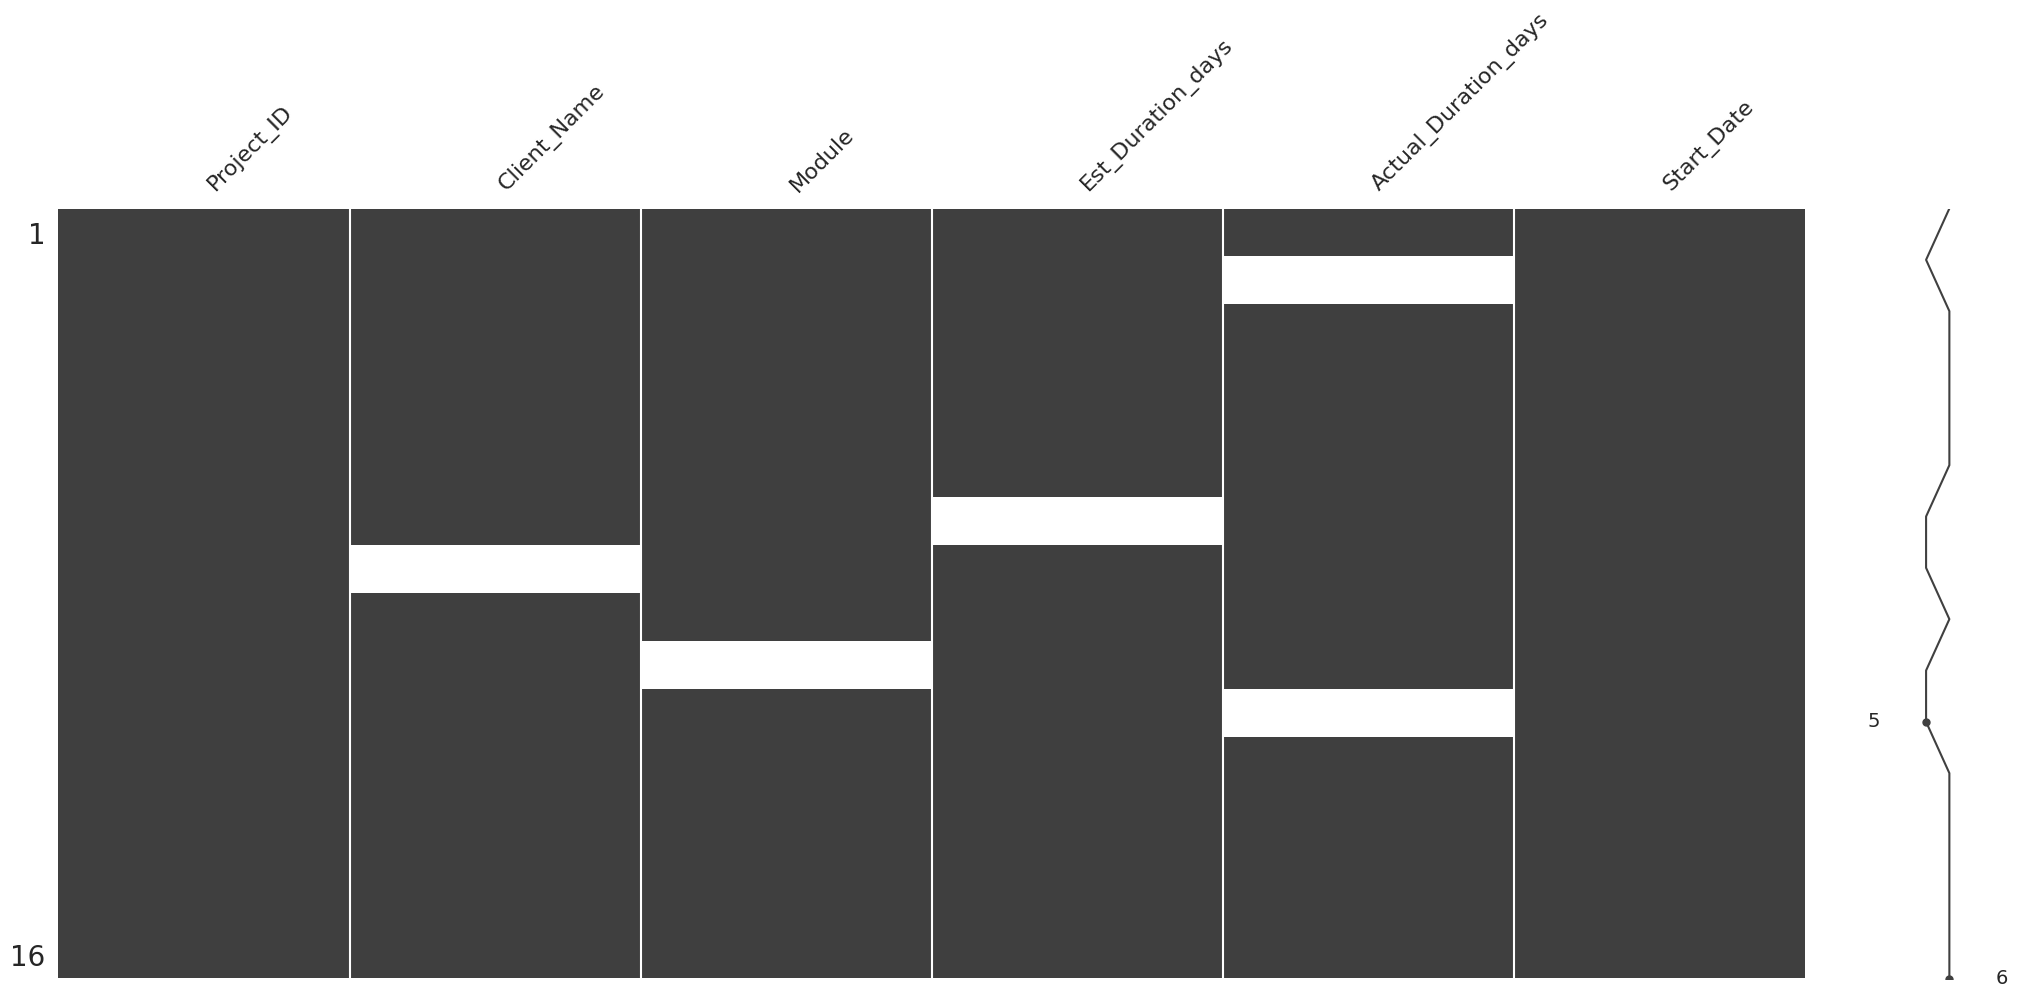

In [6]:
import missingno as msno
!pip install missingno --quiet
msno.matrix(projects)
plt.show()


In [7]:
# --- Remove duplicates ---
projects = projects.drop_duplicates(subset=['Project_ID', 'Client_Name'], keep='first')

# --- Handle missing values ---
projects['Est_Duration_days'].fillna(projects['Est_Duration_days'].median(), inplace=True)
projects['Actual_Duration_days'].fillna(projects['Actual_Duration_days'].median(), inplace=True)
projects['Module'].fillna('Unknown', inplace=True)
projects['Client_Name'].fillna('Unknown', inplace=True)

support['Severity'].fillna(support['Severity'].median(), inplace=True)
support['Resolution_Hours'].fillna(support['Resolution_Hours'].median(), inplace=True)
support['Client_Name'].fillna('Unknown', inplace=True)

employees['Role'].fillna('Unassigned', inplace=True)

# --- Clean financial values ---
def clean_currency(x):
    if pd.isna(x):
        return np.nan
    return float(str(x).replace(',', '').replace('USD', '').strip())

financials['Cost_USD'] = financials['Cost_USD'].apply(clean_currency)
financials['Invoiced_USD'] = financials['Invoiced_USD'].apply(clean_currency)

financials.fillna(financials.median(), inplace=True)


/tmp/ipython-input-1407351119.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  projects['Est_Duration_days'].fillna(projects['Est_Duration_days'].median(), inplace=True)
/tmp/ipython-input-1407351119.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [8]:
merged_df = projects.merge(financials, on='Project_ID', how='left') \
                    .merge(employees, on='Project_ID', how='left') \
                    .merge(support, on='Client_Name', how='left')

merged_df.head()


,Project_ID,Client_Name,Module,Est_Duration_days,Actual_Duration_days,Start_Date,Cost_USD,Invoiced_USD,Employee_ID,Name,Role,Hours_Logged,Ticket_ID,Severity,Resolution_Hours,Ticket_Date
0,1001,Acme Corp,CRM,60.0,70.0,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,5001,1.0,5.0,2024-02-01
1,1001,Acme Corp,CRM,60.0,70.0,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,5006,2.0,7.0,2024-04-16
2,1002,Zenith Inc,HRM,75.0,95.0,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,5002,2.0,10.0,2024-02-16
3,1002,Zenith Inc,HRM,75.0,95.0,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,5008,2.0,12.0,2024-05-16
4,1003,Nova LLC,Inventory,90.0,95.0,2024-03-01,60000.0,60000.0,8.0,Frank,Unassigned,61.0,5003,2.0,15.0,2024-03-02


In [9]:
merged_df['Delay_days'] = merged_df['Actual_Duration_days'] - merged_df['Est_Duration_days']
merged_df['Cost_Efficiency'] = merged_df['Invoiced_USD'] / merged_df['Cost_USD']
merged_df['Resolution_Efficiency'] = merged_df['Resolution_Hours'] / merged_df['Severity']
merged_df.head()


,Project_ID,Client_Name,Module,Est_Duration_days,Actual_Duration_days,Start_Date,Cost_USD,Invoiced_USD,Employee_ID,Name,Role,Hours_Logged,Ticket_ID,Severity,Resolution_Hours,Ticket_Date,Delay_days,Cost_Efficiency,Resolution_Efficiency
0,1001,Acme Corp,CRM,60.0,70.0,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,5001,1.0,5.0,2024-02-01,10.0,NaN,5.0
1,1001,Acme Corp,CRM,60.0,70.0,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,5006,2.0,7.0,2024-04-16,10.0,NaN,3.5
2,1002,Zenith Inc,HRM,75.0,95.0,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,5002,2.0,10.0,2024-02-16,20.0,NaN,5.0
3,1002,Zenith Inc,HRM,75.0,95.0,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN,5008,2.0,12.0,2024-05-16,20.0,NaN,6.0
4,1003,Nova LLC,Inventory,90.0,95.0,2024-03-01,60000.0,60000.0,8.0,Frank,Unassigned,61.0,5003,2.0,15.0,2024-03-02,5.0,1.0,7.5


In [10]:
summary = merged_df.groupby('Client_Name').agg({
    'Delay_days': 'mean',
    'Cost_USD': 'mean',
    'Invoiced_USD': 'mean',
    'Resolution_Efficiency': 'mean',
    'Hours_Logged': 'sum'
}).reset_index()

summary.head()


,Client_Name,Delay_days,Cost_USD,Invoiced_USD,Resolution_Efficiency,Hours_Logged
0,Acme Corp,8.0,60833.333333,63333.333333,4.250000,338.0
1,Nova LLC,15.5,60000.000000,62500.000000,7.750000,122.0
2,Orion Ltd,7.5,73750.000000,90000.000000,3.000000,333.0
3,SkyNet,0.0,NaN,NaN,5.250000,256.0
4,Unknown,15.0,75000.000000,80000.000000,6.666667,354.0


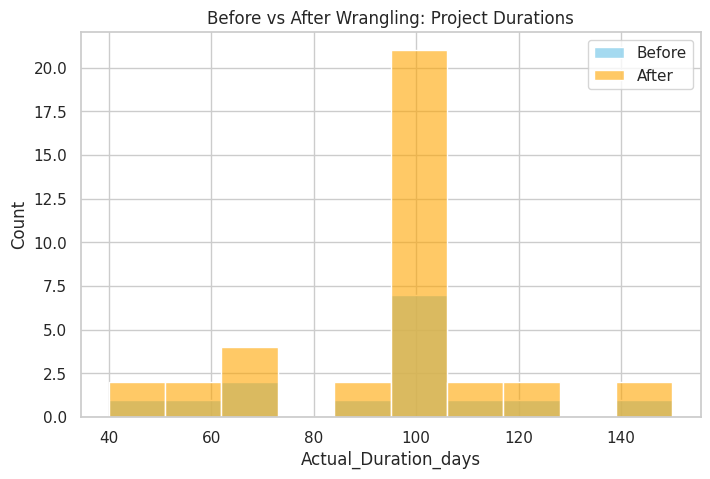

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(projects['Actual_Duration_days'], bins=10, color='skyblue', label='Before')
sns.histplot(merged_df['Actual_Duration_days'], bins=10, color='orange', label='After', alpha=0.6)
plt.legend()
plt.title('Before vs After Wrangling: Project Durations')
plt.show()


In [12]:
fig = px.bar(summary, x='Client_Name', y='Delay_days', color='Client_Name',
             title='Average Project Delay by Client', text_auto='.2f')
fig.show()


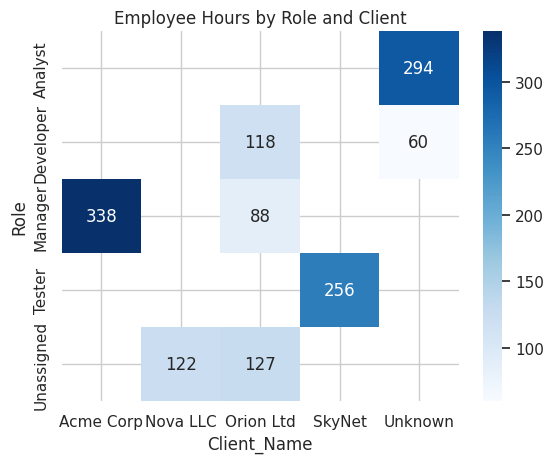

In [13]:
pivot = merged_df.pivot_table(index='Role', columns='Client_Name', values='Hours_Logged', aggfunc='sum')
sns.heatmap(pivot, cmap='Blues', annot=True, fmt=".0f")
plt.title('Employee Hours by Role and Client')
plt.show()


In [14]:
# Export messy datasets before cleaning
projects.to_csv("Messy_Projects.csv", index=False)
support.to_csv("Messy_Support_Tickets.csv", index=False)
financials.to_csv("Messy_Financials.csv", index=False)
employees.to_csv("Messy_Employees.csv", index=False)

# Export cleaned, merged dataset after wrangling
merged_df.to_csv("Cleaned_ERP_Data.csv", index=False)



In [15]:
from google.colab import files

# Download messy and clean datasets
files.download("Messy_Projects.csv")
files.download("Messy_Support_Tickets.csv")
files.download("Messy_Financials.csv")
files.download("Messy_Employees.csv")
files.download("Cleaned_ERP_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x400 with 0 Axes>

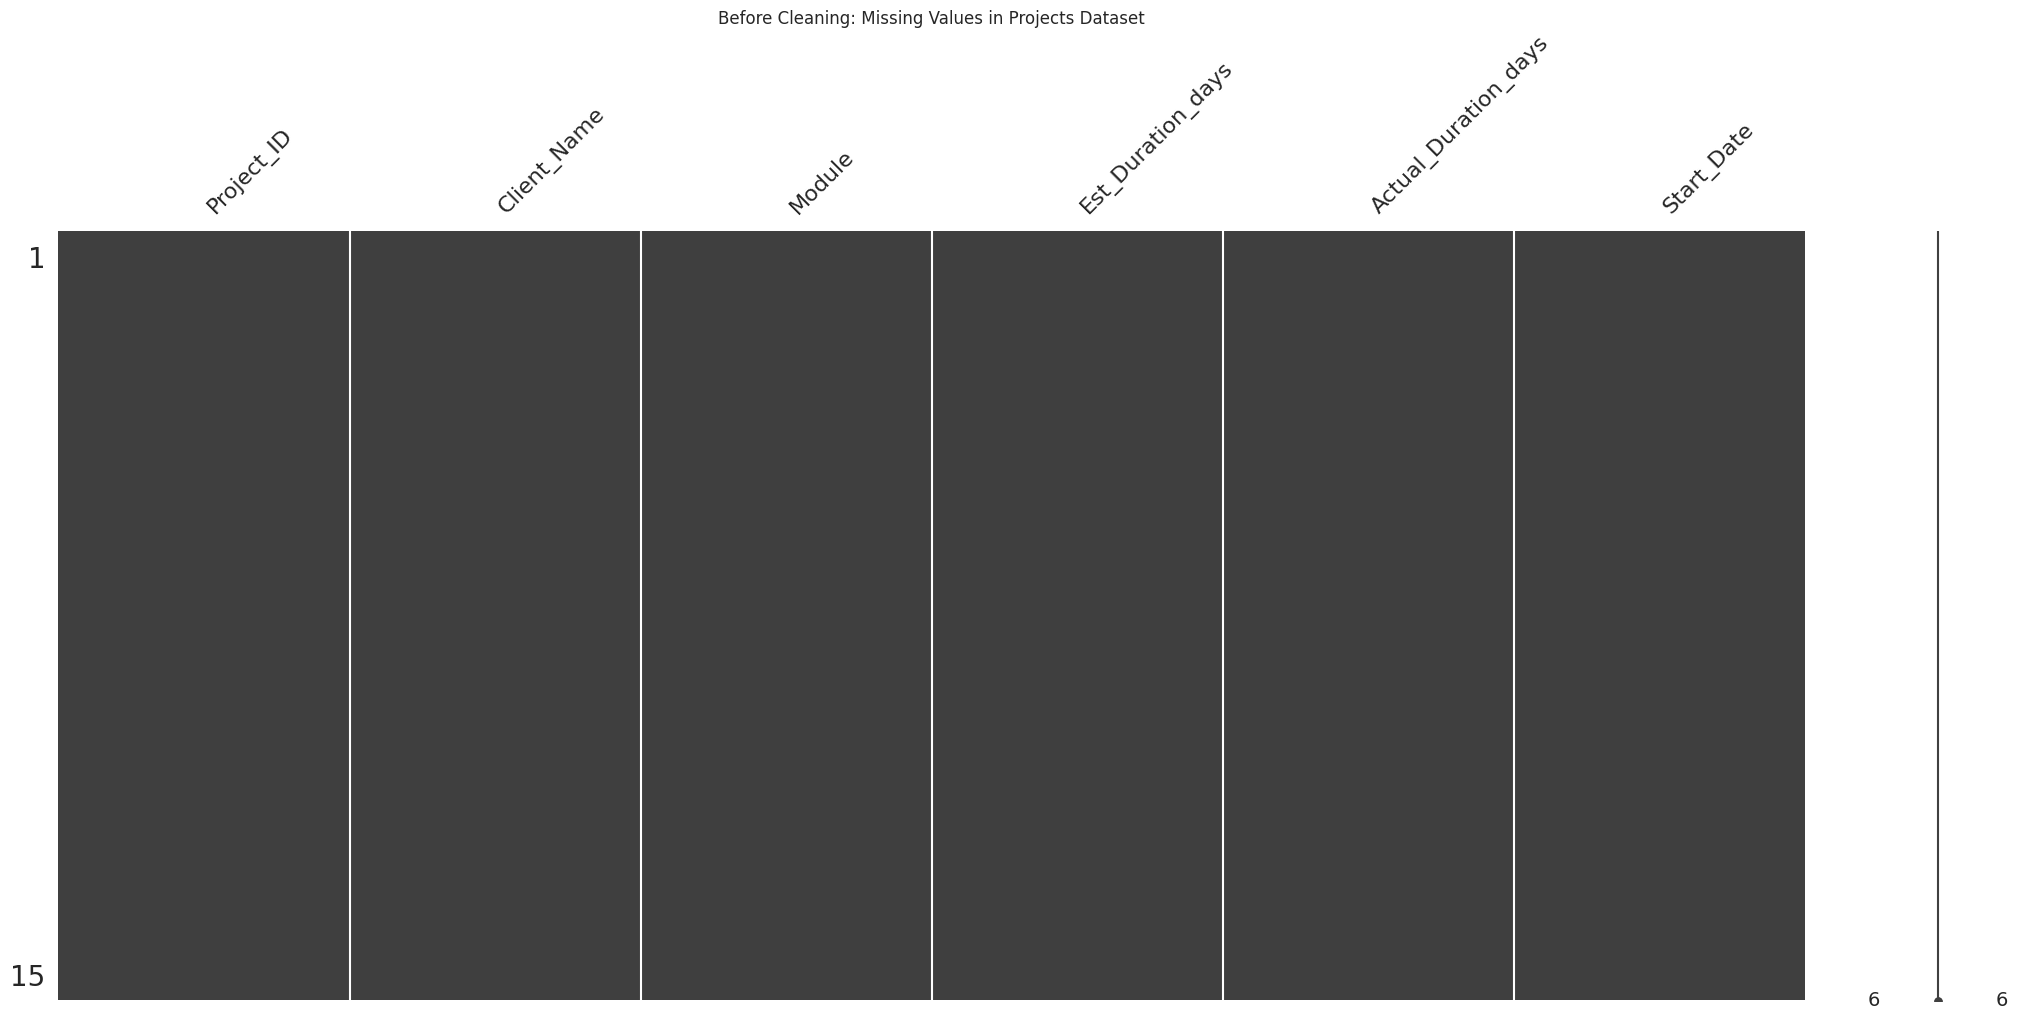

<Figure size 800x400 with 0 Axes>

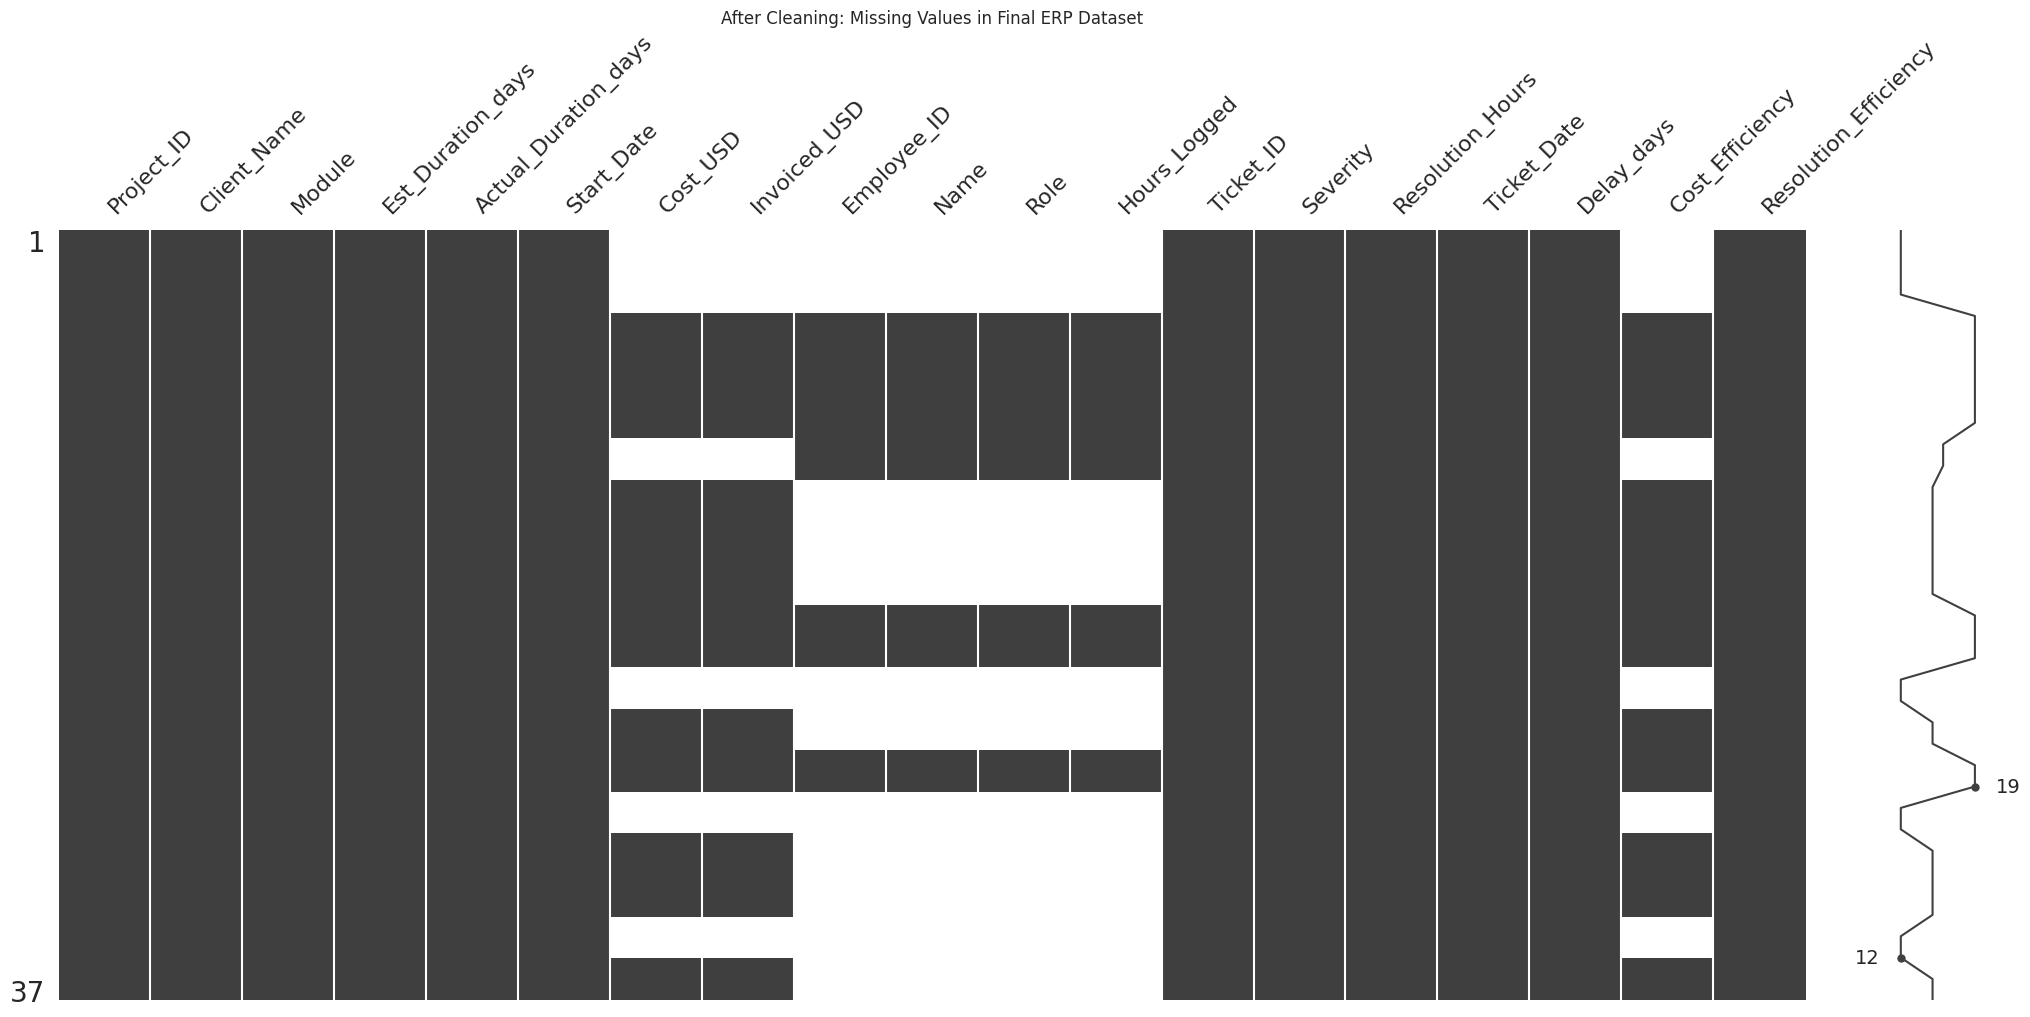

In [16]:
!pip install missingno --quiet
import missingno as msno
import matplotlib.pyplot as plt

# --- Before Cleaning ---
plt.figure(figsize=(8,4))
msno.matrix(projects)
plt.title("Before Cleaning: Missing Values in Projects Dataset")
plt.show()

# --- After Cleaning (on merged dataset) ---
plt.figure(figsize=(8,4))
msno.matrix(merged_df)
plt.title("After Cleaning: Missing Values in Final ERP Dataset")
plt.show()


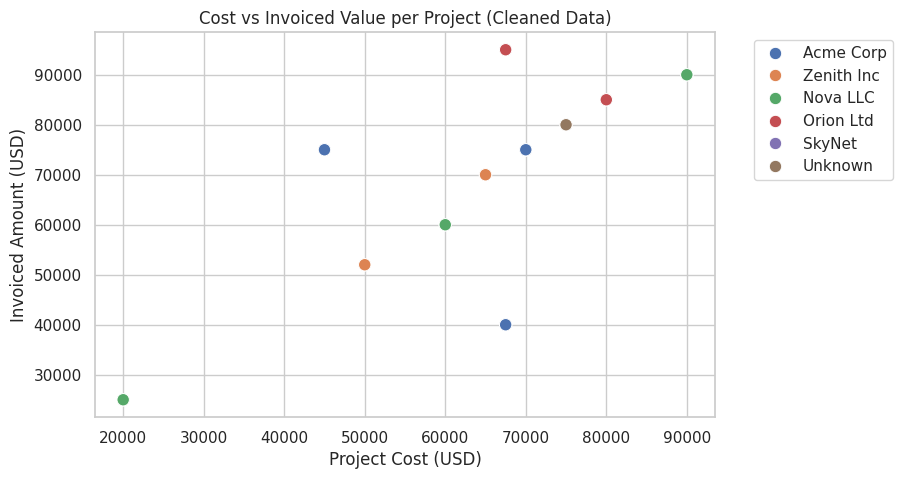

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged_df, x='Cost_USD', y='Invoiced_USD', hue='Client_Name', s=80)
plt.title('Cost vs Invoiced Value per Project (Cleaned Data)')
plt.xlabel('Project Cost (USD)')
plt.ylabel('Invoiced Amount (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


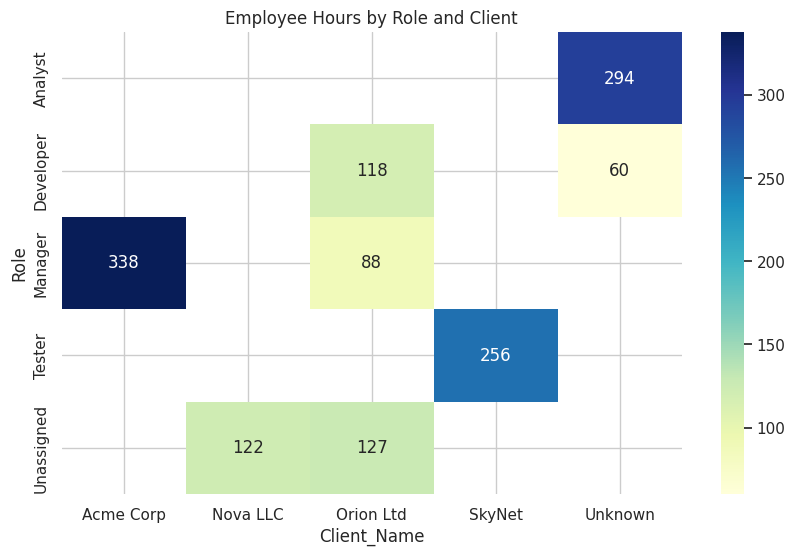

In [19]:
pivot = merged_df.pivot_table(index='Role', columns='Client_Name', values='Hours_Logged', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Employee Hours by Role and Client')
plt.show()
